# 데이콘 소득예측 데이터 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. read data

In [2]:
df = pd.read_csv('C:\\Users\\kjm\\Downloads\\open\\train.csv')

In [3]:
df.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [4]:
df.shape

(20000, 23)

In [5]:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

`-` read data

- data shape은 20000개의 행과 23개의 칼럼으로 구성되어있다.
- 결측치는 존재하지 않는 것으로 보인다
- 각 칼럼은 연속형과 이산형 변수가 혼합되어있어 이들을 분리하는 것이 필요해보인다.

`-` 변수
- ID : 고객의 지정 넘버로 별다른 정보가 없기 때문에 분석에 사용하지 않을 것임
- Age : 고객의 나이, 연속형 변수
- Gender : 성별, 이산형 변수
- Education_Status  : 최종학력을 의미한다. 이산형 변수
- Employment_Status  : 취업 상태를 의미한다. 이산형 변수
- Working_Week (Yearly) : 주당 일하는 시간으로 해석된다. 연속형변수 or 범주를 잡아 이산형으로 파악 가능
- Industry_Status  : 산업분야, 이산형 변수
- Occupation_Status : 직업 분야, 이산형 변수
- Race : 인종, 이산형변수
- Hispanic_Origin : 히스패닉 출신, 이산형 변수
- Martial_Status : 결혼 여부, 이산형 변수
- Household_Status : 가족 구성, 이산형 변수
- Household_Summary : 가족 구성 요약, 이산형 변수
- Citizenship : 시민권, 이산형 변수
- Birth_Country  : 국적, 이산형변수
- Birth_Country (Father) : 아버지의 국적, 이산형변수
- Birth_Country (Mother) : 어머니의 국적, 이산형변수
- Tax_Status : 세금 여부, 이산형변수
- Gains : 이득또는 매출로 보인다, 연속형 변수
- Losses : 지출로 보인다, 연속형 변수
- Dividends : 배당금, 연속형 변수
- Income_Status : 소득 상태, 이산형변수
- income : 소득, 연속형 변수
    
`-` 정리
- 이산형 변수가 매우 많아 이들을 전처리하는 과정이 매우 중요할 것으로 보인다.
- 변수들끼리 서로 상관성이 높아보이는 요소가 있다. 이들은 fitting할때, 어떤 처리를 해볼 수도 있을 것이다. 

---

In [6]:
# 연속형 변수 추출
df_int = df[df.describe().columns]
# 이산형 변수 추출
df_str = df[df.columns.difference(df.describe().columns)]

## 2. 연속형 변수 EDA

In [7]:
df_int.describe() # 전체 요약 통계량

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


### 1. AGE

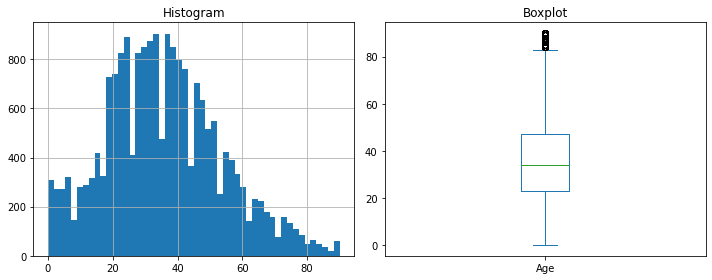

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_int['Age'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

df_int['Age'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [9]:
df_int['Age'].describe()

count    20000.000000
mean        35.632500
std         17.994414
min          0.000000
25%         23.000000
50%         34.000000
75%         47.000000
max         90.000000
Name: Age, dtype: float64

`-` AGE의 히스토그램과 박스플랏
- 이들의 분포는 크게 이상하지 않다
- 평균과 중앙값에 큰차이가 없지만 오른쪽이 다소 조금 긴 형태를 띄고 있다.
- 박스플랏을 통해서도 큰 이상치는 존재하지 않아 보인다.

---

### 2. Working_Week (Yearly)

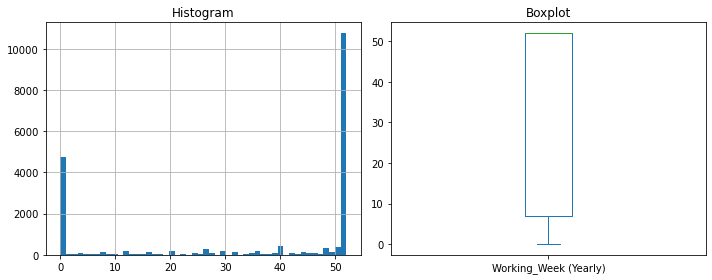

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_int['Working_Week (Yearly)'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

df_int['Working_Week (Yearly)'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [11]:
df_int['Working_Week (Yearly)'].describe()

count    20000.000000
mean        34.943050
std         22.254592
min          0.000000
25%          7.000000
50%         52.000000
75%         52.000000
max         52.000000
Name: Working_Week (Yearly), dtype: float64

`-`  Working_Week (Yearly)
- 히스토그램을 통해 분포가 아주 극단적인 것을 확인할 수 있다.
- 평균과 중앙값에 차이가 있으며 심지어 최댓값이 중앙값과 일치한다.
- 이는 평균이나 중앙값이 가진 통계량에 정보가 크리티컬하지 않음을 보여준다
- boxplot을 통해 이상치가 없는 것을 확인할 수 있다
- 모델에 fitting할때 특수한 전처리가 필요할 것으로 보여진다. 또는 범주 그룹을 나누어 볼 법도 하다.
- 연속형이지만 히스토그램을 통한 분포는 베르누이분포와 유사하며 이산형으로 전처리가 가능해보인다

---

### 3. Gains

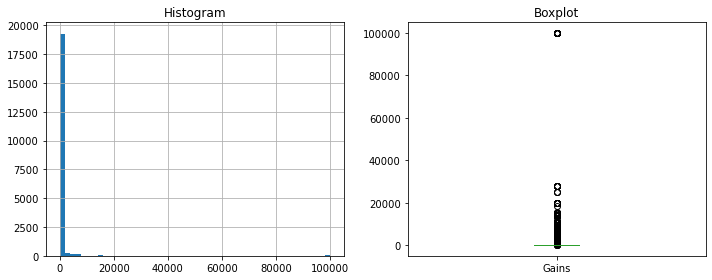

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_int['Gains'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

df_int['Gains'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [13]:
df_int['Gains'].describe()

count    20000.000000
mean       383.129500
std       4144.247487
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Gains, dtype: float64

`-` Gains
- 왼쪽에 극단적으로 쏠려있는 분포로 경제 분야에서 많이 나타나는 형태로 변수 변환이 필요해보인다.
- 최솟값, 중위값, 평균, 75%분위수 값이 전부 0으로 통일되있다. 범주형 변수로 그룹화도 가능해보인다.
- boxplot을 통해서 이상치가 있음을 알 수 있다. 실제 관측치라고 하더라도 모델 적합에 불리해보이니 처리가 필요해보인다

---

### 4. LOSSES

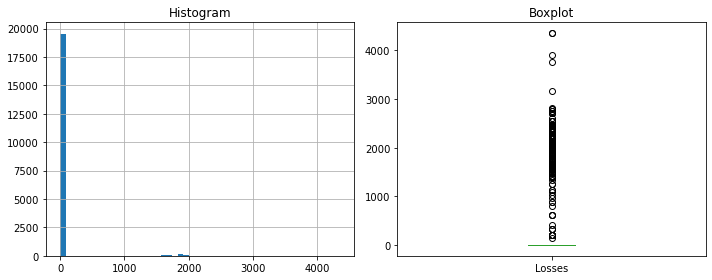

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_int['Losses'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

df_int['Losses'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [15]:
df_int['Losses'].describe()

count    20000.000000
mean        40.202150
std        279.182677
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Losses, dtype: float64

`-` Losses
- 마찬가지로 왼쪽에 극단적으로 쏠려 있는 분포로 변수 변환이 필요해보인다.
- 최솟값, 중위값, 평균, 75%분위수 값이 전부 0으로 통일되있다. 범주형 변수로 그룹화도 가능해보인다.
- 이상치가 존재하지만 삭제에 대한 고려를 해보아야할 것 같다. 

---

### 5. INCOME

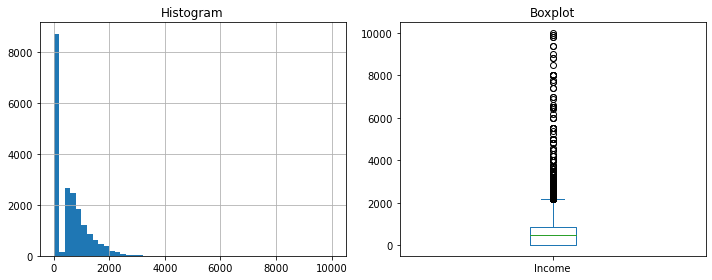

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_int['Income'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

df_int['Income'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

`-` income
- 마찬가지로 경제, 금융과 관련된 변수의 분포는 왼쪽에 몰려있는 것을 확인할 수 있고 이또한 변수변환이 필요해보인다.
- 이상치또한 존재하지만, 삭제에 대한 고려가 필요해보인다.

### 6. log 변환

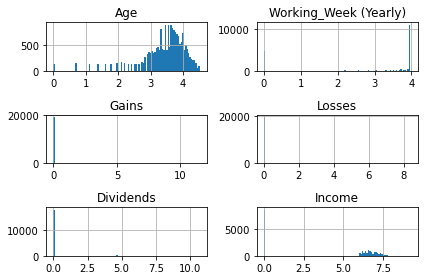

In [17]:
np.log(df_int+1).hist(bins=100)

plt.tight_layout()

plt.show()

- log 변환를 진행했지만 극단적인 분포꼴이 대부분 그대로 나타나 있다.

### 6.2 범주형으로 변환

- 연속형 변수중에서 분포가 극단적인 변수를 범주로 바꾼 히스토그램이다.
- log 변환 x

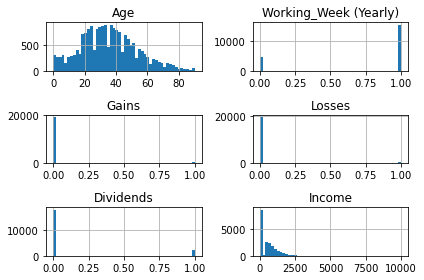

In [18]:
zeroone= [df_int.iloc[:,i].apply(lambda x: 0 if x == 0 else 1) for i in range(1,5)]
df_zeroone= pd.DataFrame(zeroone).T
df_int_zeroone= pd.concat([df_int.iloc[:,[0]],df_zeroone,df_int.iloc[:,[-1]]],axis=1)
df_int_zeroone.hist(bins=50);
plt.tight_layout()

plt.show()

## 3. 변수간 상관성

- 오류 방지를 위해 모든 변수에 +1을 하고 log 변환 진행 후 확인

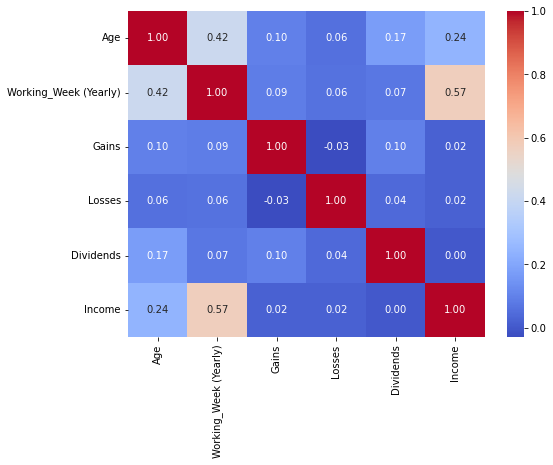

In [19]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(np.log(df_int+1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- 소득과 주중근로시간이 양의 상관성이 높게 나왔다. 
    - 근로시간의 많고 적음에 따라 급여가 달라질 수 있으니 어찌보면 당연한 것



- 나이와 주중근로시간이 양의 상관성이 높게 나왔다
    - 나이가 많아짐에 따라 직장인의 비율이 높아질 것으로 보임
    - 따라서 취업 비율이 높아짐에 따라 주중근로시간은 높게 나타날 것



- 나이와 소득또한 어느정도 상관성이 있어보인다.
    - 마찬가지로 청소년과 직장인 누가 더 소득이 높을 것인가?
    - 나이에 따라 소득은 어느정도 양의 상관성을 지닐 것이다

---

## 4.  회귀분석
- income 변수를 y로 설정하고 나머지 연속형 변수를 설명변수로 모델에 적합
- model1 : 연속형 변수에 로그변환만을 취함
- 로그변환은 하는 것이 하지 않는 것보다 모델 적합에 훨씬 용이하게 나왔음

In [20]:
import statsmodels.api as sm

### model1 

In [21]:
df_int1 = np.log(df_int+1)
X = df_int1.drop(['Income'], axis=1) 
X = sm.add_constant(X)  # 상수 항 추가
y = df_int1['Income']

model1 = sm.OLS(y,X)
results1 = model1.fit()

results1.summary()

C:\Users\kjm\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     1944.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:36:19   Log-Likelihood:                -48688.
No. Observations:               20000   AIC:                         9.739e+04
Df Residuals:                   19994   BIC:                         9.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3127      0.097      3.223      0.001       0.123       0.503
Age                       0.0658      0.031      2.139      0.032       0.005       0.126
Working_Week (Yearly)     1.1597      0.013     88.975      0.000       1.134       1.185
Gains                    -0.0588      0.012     -4.988      0.000      -0.082      -0.036
Losses                   -0.0460      0.018     -2.557      0.011      -0.081      -0.011
Dividends                -0.0745      0.011     -6.501      0.000      -0.097      -0.052
==============================================================================
Omnibus:                     1761.047   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2068.317
Skew:                          -0.761   Prob(JB):                         0.00
Kurtosis:                       2.595   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 결정계수 0.327, f통계량 1944 모델의 유의성은 있어보인다.
- 각 변수끼리의 신뢰여부 또한 Age와 Losses 제외하고 유의함
- 특히 주중근로시간이 t-value가 매우 높아 모델적합에 있어 중요한 변수로 작용
- gains, losses, dividends 변수는 계수가 음수를 띄고 있어 이들이 증가하며 소득에 불리한 영향을 미치는 것으로 보여진다.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 독립 변수 간의 VIF 계산
vif_data = X.assign(const=1) # 상수항 추가
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# 결과 출력
print(vif)

                Variable        VIF
0                  const  24.705914
1                    Age   1.250449
2  Working_Week (Yearly)   1.219781
3                  Gains   1.020965
4                 Losses   1.007572
5              Dividends   1.040005


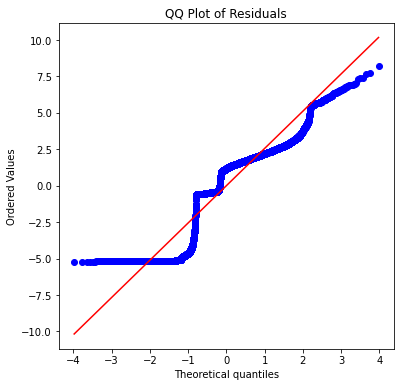

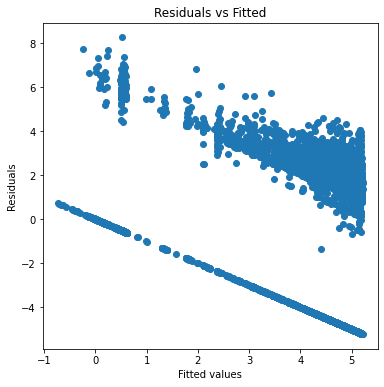

In [23]:
import scipy.stats as stats

# 회귀 모델 결과
results = sm.OLS(y, X).fit()

# 잔차 계산
residuals = results.resid

# QQ 플롯 그리기 (잔차의 정규성 확인)
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title('QQ Plot of Residuals')
plt.show()

# 잔차와 예측 값의 산점도 그리기 (등분산성 확인)
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(results.fittedvalues, residuals)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted')
plt.show()

In [25]:
# test.csv 파일에서 데이터 불러오기
test_data = pd.read_csv("C:\\Users\\kjm\\Downloads\\open\\test.csv")

In [30]:
# 독립 변수 추출 (const 상수항은 자동으로 추가됨)
X_test = sm.add_constant(test_data[['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends']])

C:\Users\kjm\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
# 모델을 사용하여 예측값 계산
predicted_values = results.predict(X_test)

In [32]:
print("예측된 수입:")
print(predicted_values)

예측된 수입:
0        5.509926
1        3.404736
2       61.801640
3       37.669630
4        0.707461
          ...    
9995    62.656873
9996    62.393724
9997     9.614852
9998     0.904823
9999    47.778051
Length: 10000, dtype: float64


In [36]:
# 예측값을 데이터프레임으로 변환
predictions_df = pd.DataFrame({'ID': test_data['ID'], 'Income': predicted_values})

In [38]:
predictions_df.head()

,ID,Income
0,TEST_0000,5.509926
1,TEST_0001,3.404736
2,TEST_0002,61.801640
3,TEST_0003,37.669630
4,TEST_0004,0.707461


In [39]:
# CSV 파일로 저장
predictions_df.to_csv('sample_submission.csv', index=False)

---